In [2]:
import pandas as pd

In [6]:
data=pd.read_csv("D:\\DATA_science\\Data_sets\\Multilinear_Reg\\Toyoto_Corrola.csv")
data.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [10]:
data.isnull().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
data.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


In [19]:
data1=data.drop(['Cylinders','Id','Model'],axis=1)
data1.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [21]:
data1.corr()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


In [12]:
import seaborn as sns

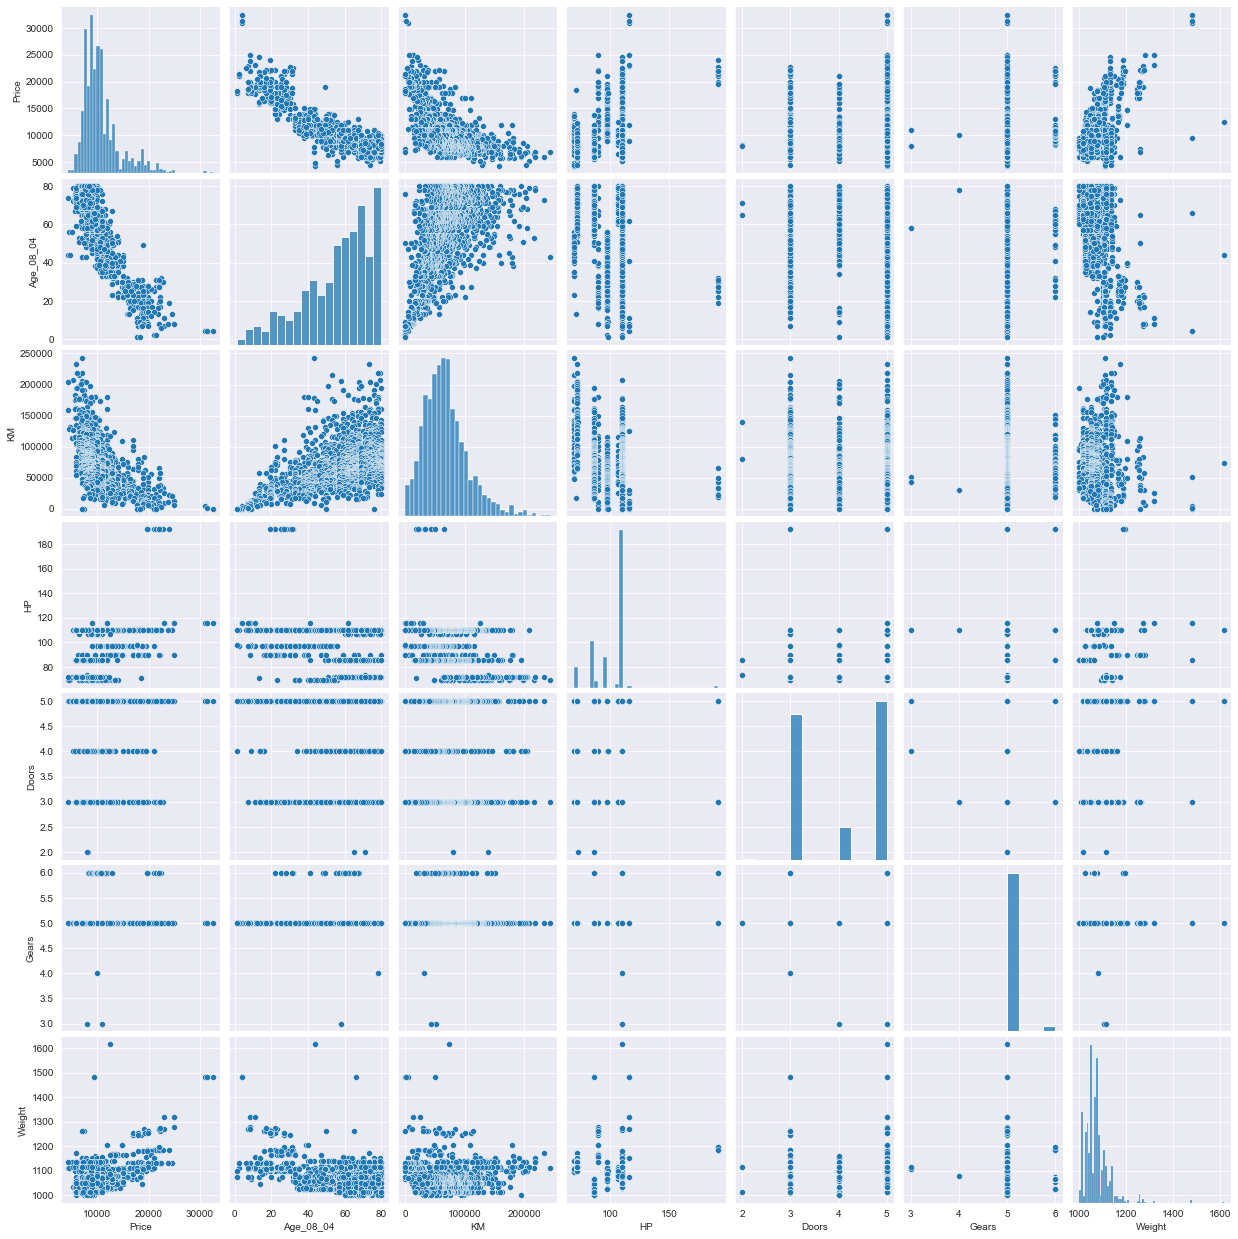

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [23]:
data1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Gears', 'Weight'], dtype='object')

In [26]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data=data1).fit()

In [27]:
model.params

Intercept   -6984.373566
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [28]:
(model.tvalues,'\n',model.pvalues)

(Intercept    -5.323309
 Age_08_04   -46.728942
 KM          -16.542560
 HP           10.842418
 Doors        -0.242055
 Gears         3.152234
 Weight       22.446903
 dtype: float64,
 '\n',
 Intercept     1.181900e-07
 Age_08_04    4.387432e-290
 KM            2.238900e-56
 HP            2.231791e-26
 Doors         8.087723e-01
 Gears         1.653931e-03
 Weight        7.856458e-96
 dtype: float64)

In [36]:
(model.rsquared,model.rsquared_adj)

(0.8628024511073658, 0.8622263942190832)

In [30]:
model1=smf.ols('Price~Age_08_04+KM+HP+Gears+Weight',data=data1).fit()

In [32]:
model1.params

Intercept   -7006.827227
Age_08_04    -122.243676
KM             -0.019996
HP             28.282948
Gears         631.543519
Weight         18.557373
dtype: float64

In [34]:
model1.tvalues,'\n',model1.pvalues

(Intercept    -5.355584
 Age_08_04   -46.745013
 KM          -16.550661
 HP           10.881794
 Gears         3.262043
 Weight       23.192000
 dtype: float64,
 '\n',
 Intercept     9.925271e-08
 Age_08_04    2.772608e-290
 KM            1.985300e-56
 HP            1.496107e-26
 Gears         1.132207e-03
 Weight       2.904479e-101
 dtype: float64)

In [35]:
model1.rsquared,model1.rsquared_adj

(0.8627968258548101, 0.86231709447668)

In [37]:
model_d=smf.ols('Price~Doors',data=data1).fit()

In [38]:
(model_d.params)

Intercept    7885.005835
Doors         705.558636
dtype: float64

In [39]:
model_d.rsquared,model_d.rsquared_adj

(0.03434555943109785, 0.03367216023962727)

In [40]:
model_d.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [41]:
data1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Gears', 'Weight'], dtype='object')

In [58]:
rsq_age=smf.ols('Age_08_04~KM+HP+Doors+Weight',data=data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age_08_04+HP+Doors+Weight',data=data).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols("HP~Age_08_04+KM+Doors+Gears+Weight",data=data).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_d=smf.ols('Doors~Age_08_04+KM+HP+Gears+Weight',data=data).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_g=smf.ols('Gears~Age_08_04+HP+KM+Doors+Weight',data=data).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_w=smf.ols('Weight~Age_08_04+HP+KM+Doors+Gears',data=data).fit().rsquared
vif_w=1/(1-rsq_w)

df={"Variables":['Age_08_04','KM','HP','Doors','Gears','Weight'],"VIF":[vif_age,vif_km,vif_hp,vif_d,vif_g,vif_w]}
df=pd.DataFrame(df)
df

,Variables,VIF
0,Age_08_04,1.873766
1,KM,1.614292
2,HP,1.214909
3,Doors,1.149301
4,Gears,1.096501
5,Weight,1.508041


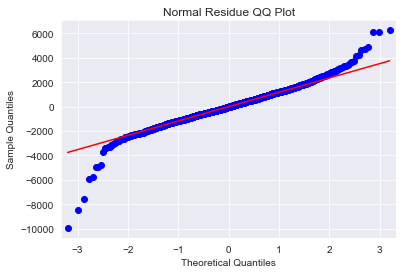

In [63]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
import matplotlib.pyplot as plt
plt.title('Normal Residue QQ Plot')
plt.show()

In [72]:
import numpy as np
a=list(np.where(model.resid>4000))
b=list(np.where(model.resid<-4000))
print(a,b)

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)] [array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]


In [73]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

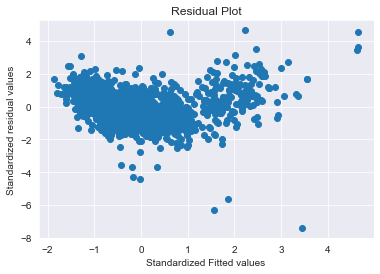

In [74]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

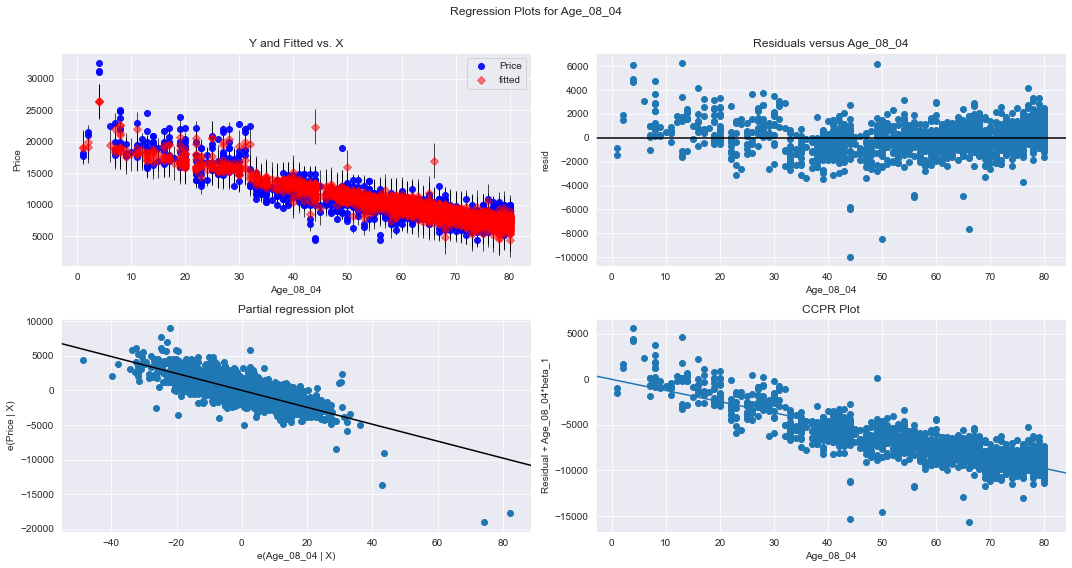

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

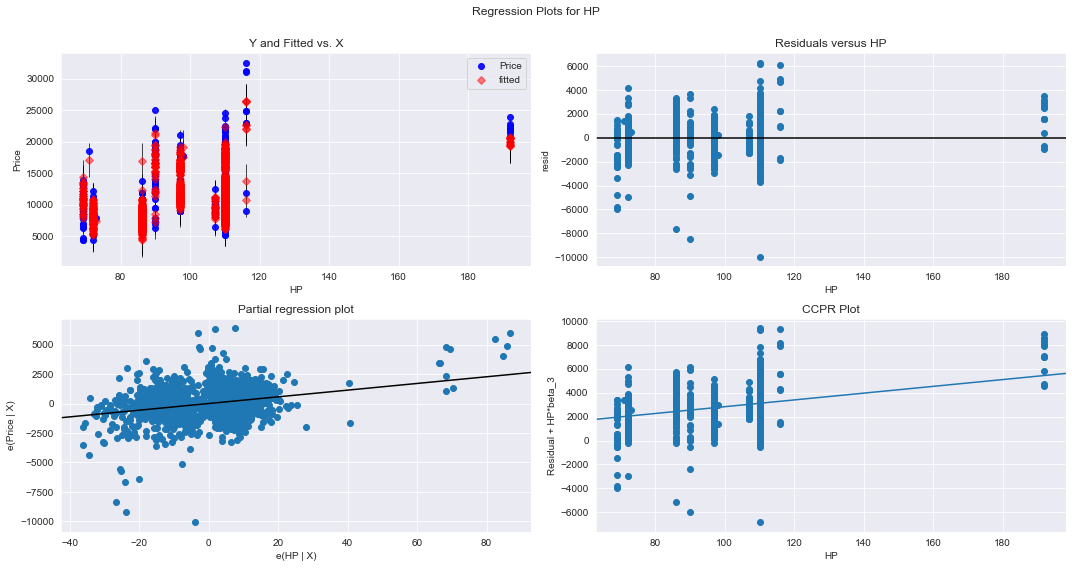

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

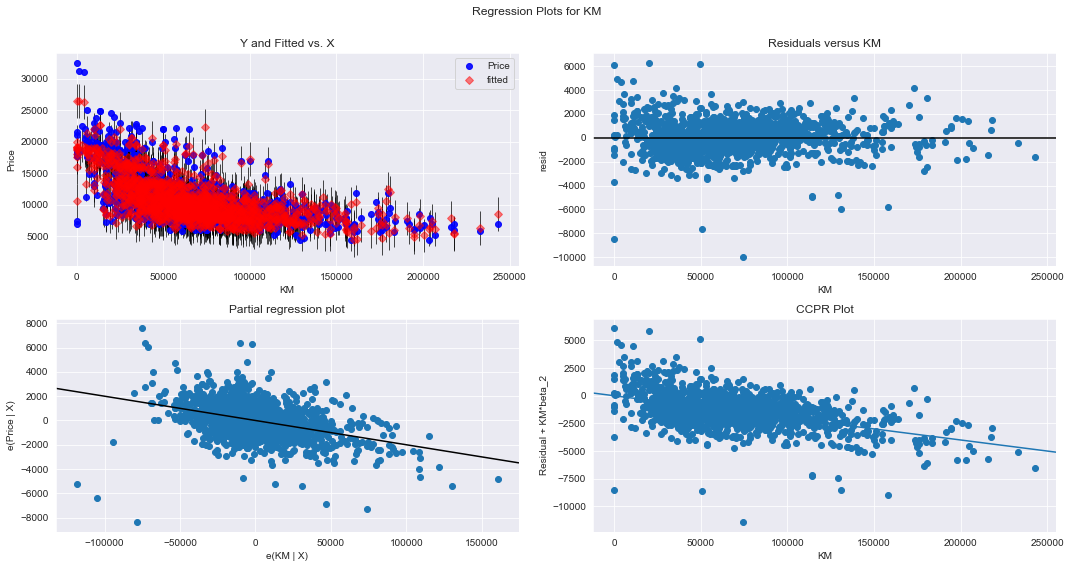

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

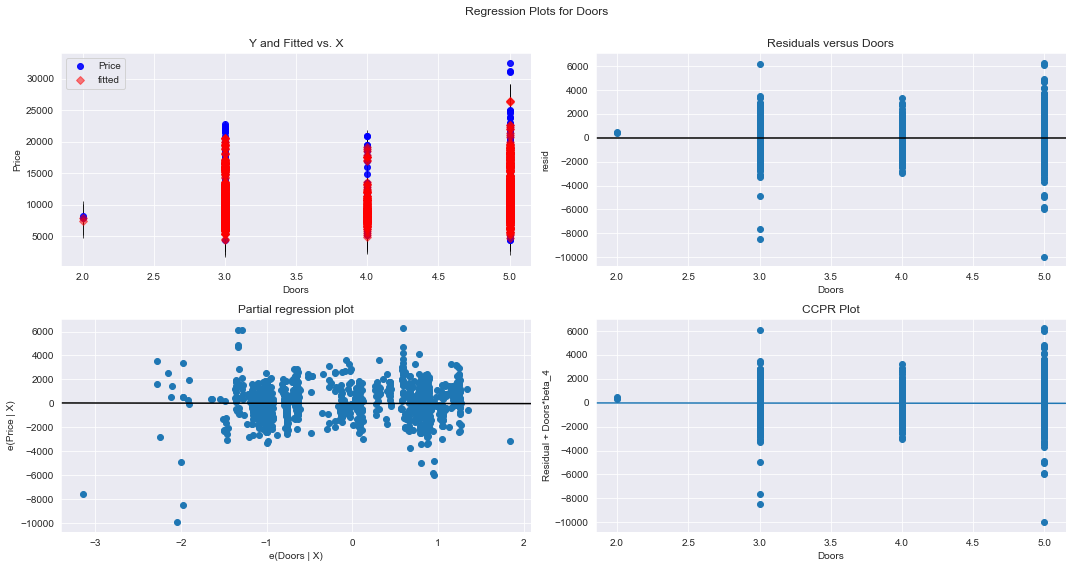

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

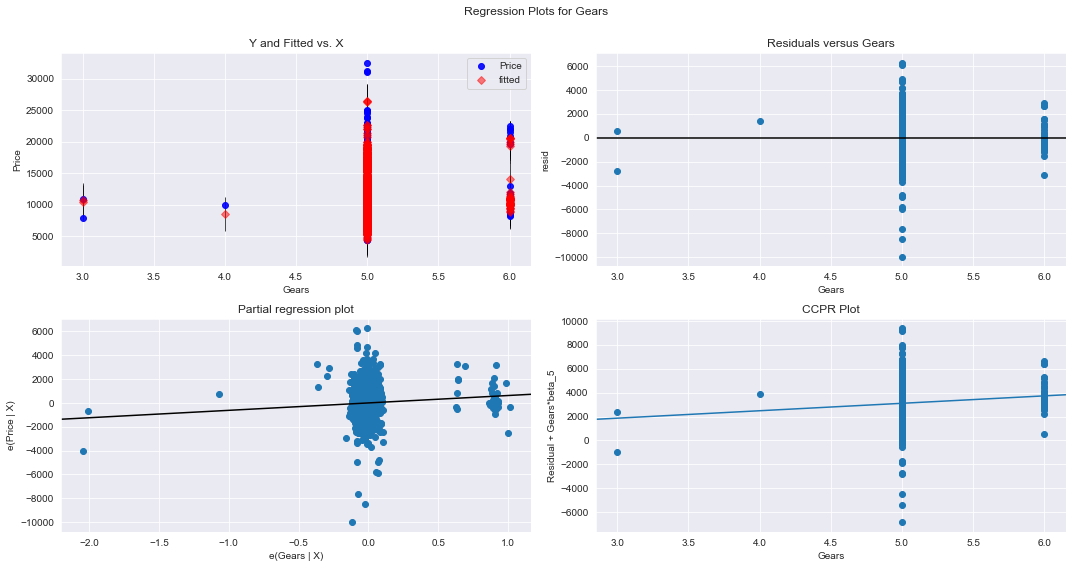

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

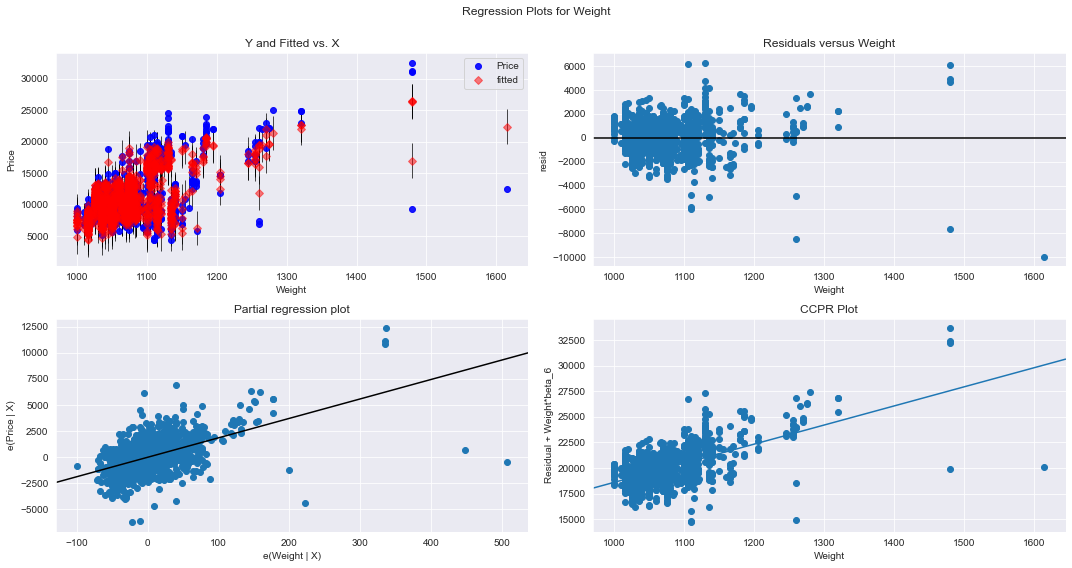

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [81]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

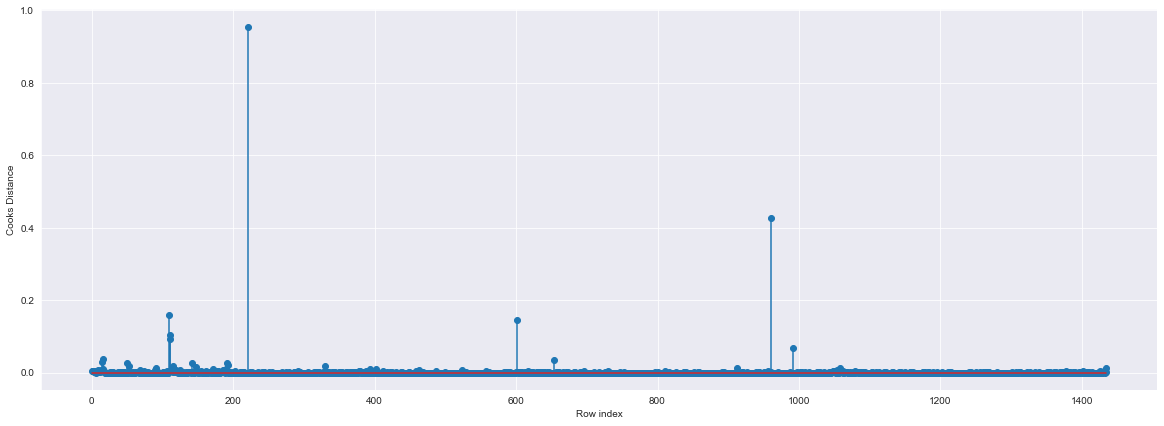

In [84]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [85]:
(np.argmax(c),np.max(c))

(221, 0.9553151438694948)

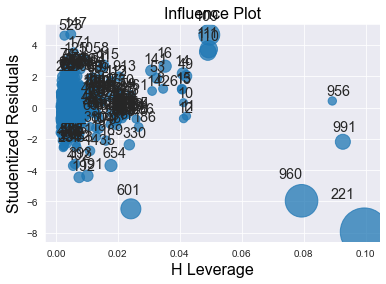

In [86]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [87]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [89]:
data[data.index.isin([221])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615


In [90]:
data.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [97]:
data2=data.drop(data.index[[221]],axis=0).reset_index()

In [98]:
data2=data2.drop(['Id','Model','index'],axis=1)

In [99]:
data2

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,4,5,1025
1431,10845,72,19000,86,3,4,5,1015
1432,8500,71,17016,86,3,4,5,1015
1433,7250,70,16916,86,3,4,5,1015


In [100]:
final_p_model=smf.ols('Price~Age_08_04+HP+KM+Doors+Gears+Weight',data=data2).fit()

In [101]:
(final_p_model.rsquared,final_p_model.aic)

(0.8685941460420765, 24696.801453325905)

In [102]:
final_d_model=smf.ols('Price~Age_08_04+HP+KM+Gears+Weight',data=data2).fit()

In [103]:
(final_d_model.rsquared,final_d_model.aic)

(0.8685416764053224, 24695.37432659029)

In [104]:
new_data=pd.DataFrame({'Age_08_04':25,"KM":50000,"HP":85,"Doors":3,"""Gears":5,"Weight":1150},index=[1])

In [105]:
new_data

,Age_08_04,KM,HP,Doors,Gears,Weight
1,25,50000,85,3,5,1150


In [106]:
final_d_model.predict(new_data)

1    15925.952372
dtype: float64